## installing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## importing data

In [2]:
data = pd.read_csv('insurance.csv')

print(data.shape)

data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
data['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [8]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### data analysis

Text(0.5, 1.0, 'Age vs Charges')

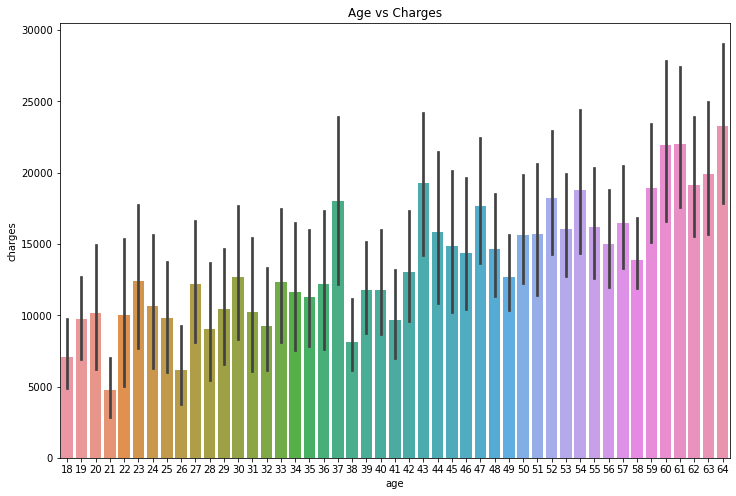

In [12]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

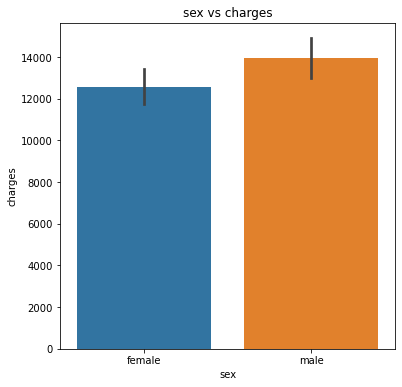

In [13]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

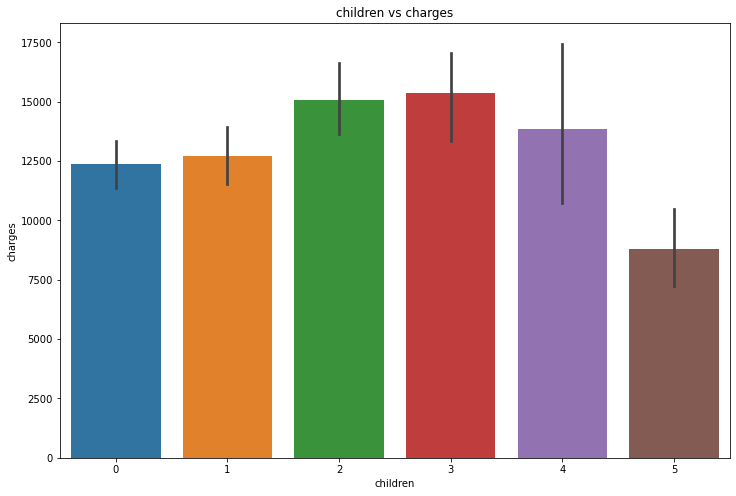

In [14]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

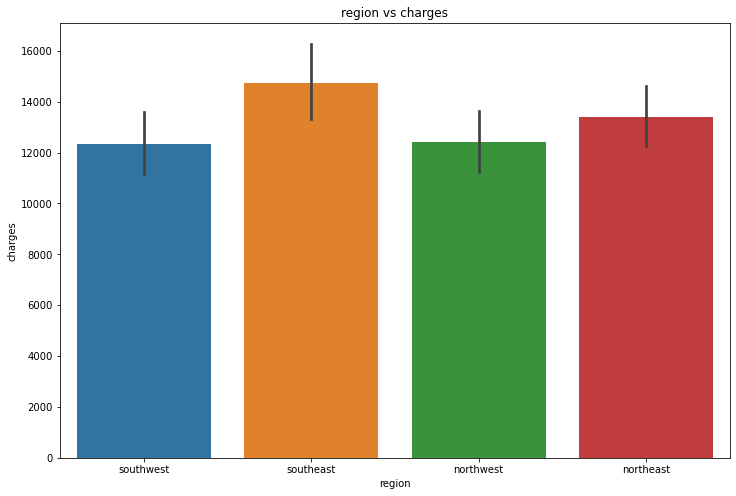

In [15]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

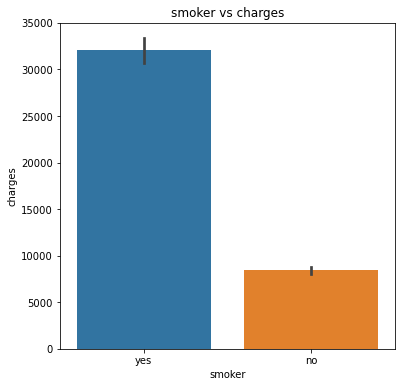

In [16]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

## corrleation plot

<AxesSubplot:>

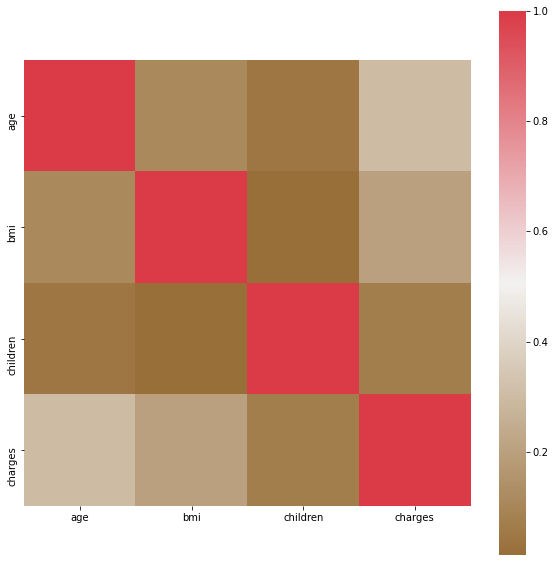

In [17]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

### dtata preprocessing

In [18]:
# removing unnecassary columns from the dataset

data = data.drop('region', axis = 1)

print(data.shape)

data.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [19]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [20]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [21]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [22]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [23]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [24]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


 # modeling ### linear regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 37806750.25007653
RMSE : 6148.719399198221
r2 score : 0.7549043319540902


In [26]:
y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [27]:
y_pred

array([34463.03582081,  5351.63285316,  5380.9763682 , 25960.03740848,
       12496.7519736 ,  6408.63819349,  4081.62037308,  9300.34454944,
       32957.30705757, 10937.63104598,  7519.13584334,  9726.30820152,
       34438.32925237, 11046.23596617,   819.90626006, 35368.51634447,
       11430.73775682,  8747.50405981, 28520.23066838, 10780.77269818,
         885.55261833,  8140.91449068,  7686.87521254, 10734.04414171,
       32605.85490348, 38733.33147903, 14385.6266007 ,  2947.77854767,
       10456.87417122, 14224.24201886,  1675.51537561, 30193.11285619,
         944.28091937, 14459.05536274, 12261.67368565,  8411.64973742,
        1863.86250159,  6487.85043844,   186.61387983,  8192.76868362,
        6366.87004436, 33513.53920691,  2007.49195393, 13551.24985198,
       10145.95016308, 29556.16908321,  4878.71697149,  2536.59789849,
        2321.4068302 ,  4974.23941116, 10987.31701618, 12416.97110239,
       11958.11247547,   878.6345611 , 10867.31696491,  7014.47673418,
      

# SUPPORT VECTOR MACHINE

In [28]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 174595630.81989565
RMSE : 13213.46399775228
r2 score : -0.13187810353027452


# RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 21771774.952780135
RMSE : 4666.023462519251
r2 score : 0.8588567467105678


In [30]:
print(y_pred)

[45053.13146875  5693.88788415  5879.46537583 16791.04722302
 10289.48680578  5693.88788415  2580.17659505 10300.81036863
 41599.43173212 13107.51925818  6714.47477196 10389.70319755
 46358.05303823 12939.69814274  2580.17659505 24399.25003488
 10268.80194121  8804.76236121 17774.22459419 10018.36594206
  2580.17659505  6126.75960955 10295.86368702  7832.76541377
 25674.69016332 45347.71523488 13831.94950896  5526.42248895
  6800.16285093 10632.10503483  5496.35832274 37237.44182396
  2636.93402307 10472.86455038 13107.51925818  6126.75960955
  2535.67046477  6714.47477196  2580.17659505  6346.48604942
  6331.28255482 23397.47545993  4541.43708997 13107.51925818
  6616.83239487 39932.9271464   6315.03002812  2580.17659505
  3252.97787716  6201.34369716  6991.87138643  9776.90803923
 13252.99287897  2535.67046477  6800.16285093  7553.09780525
 20326.70735706  5271.40914819 13107.51925818  6352.15970013
 13204.93525049  6346.48604942 10931.78334347  5108.18290636
  2580.17659505  5596.24

In [31]:
print(y_test)

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64



# Decision Forest


In [32]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 42566504.71200068
RMSE : 6524.301089925318
r2 score : 0.7240475354332774


In [33]:
print(y_pred)

[41097.16175   4449.462     4747.0529   19444.2658    8457.818
 18903.49141   1141.4451    9225.2564   62592.87309  10959.33
  5484.4673   20878.78443  42124.5153   11938.25595   1131.5066
 26926.5144   20878.78443   9101.798    19444.2658    7345.084
  1131.5066    4889.9995    9644.2525   12797.20962  24393.6224
 45710.20785  11264.541     4544.2348    6356.2707   10370.91255
 14426.07385  37133.8982    1515.3449    9880.068    11735.87905
  5926.846     2007.945     6123.5688    1708.0014   20420.60465
  4438.2634   24106.91255   1815.8759   10594.2257    6112.35295
 42112.2356   20177.67113   1136.3994    2639.0429    4830.63
  8538.28845   8733.22925  11455.28      1967.0227    7209.4918
  6117.4945   19719.6947    3353.4703   11735.87905   4234.927
 10450.552     5757.41345  10141.1362    3866.8552    1702.4553
  3766.8838   26140.3603   14426.07385   4766.022    10601.412
 12523.6048   11774.159275  1711.0268    8615.3      14119.62
  2709.1119    7740.337     7742.1098   17904.

In [34]:
print(y_test)

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64
